In [2]:
!pip show torchtext
!pip show torch

Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [3]:
!pip install torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.

In [4]:
!pip install portalocker==2.0.0

In [5]:
!pip install --upgrade portalocker

  Attempting uninstall: portalocker
    Found existing installation: portalocker 2.0.0
    Uninstalling portalocker-2.0.0:
      Successfully uninstalled portalocker-2.0.0


In [6]:
import torchtext
print(torchtext.__version__)

0.15.2+cpu


In [7]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import accumulate

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.datasets import AG_NEWS
from torchtext.data.functional import to_map_style_dataset

from IPython.display import Markdown as md
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



In [8]:
def plot(COST, ACC):
    plt.figure(figsize=(8, 4))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(COST, color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Loss over Epochs')

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(ACC, color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')

    plt.tight_layout()
    plt.show()


In [9]:
AG_NEWS(split="train")

ShardingFilterIterDataPipe

In [10]:
train_iter = iter(AG_NEWS(split="train"))
y, text = next(train_iter)
print(y, text)

3 Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


In [11]:
ag_news_label = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tec"}
ag_news_label[y]

'Business'

In [12]:
num_class = len(set([label for (label, text) in train_iter]))
num_class

4

In [13]:
# Reinitialize train_iter
train_iter = iter(AG_NEWS(split="train"))

# Define tokenizer and yield_tokens
tokenizer = get_tokenizer('basic_english')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text.lower()) # Lowercase conversion for consistency

# Build vocabulary
vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

# Print the vocabulary size and sample tokens
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample tokens: {list(vocab.get_stoi().keys())[:10]}")


Vocabulary size: 95811
Sample tokens: ['zzz', 'zygmunt', 'zwiki', 'zvidauri', 'zurine', 'zurab', 'zuo', 'zuloaga', 'zovko', 'zotinca']


In [14]:
vocab(["age","hello"])

[2120, 12544]

In [15]:
# Split the dataset into training and testing iterators.
train_iter , test_iter = AG_NEWS()

# Convert the training and testing iterators to map-style datasets.
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

# Determine the number of samples to be used for training and validation (5% for validation).
num_train = int(len(train_dataset) * 0.95)

# Randomly split the training dataset into training and validation datasets using `random_split`.
# The training dataset will contain 95% of the samples, and the validation dataset will contain the remaining 5%.
split_train, split_valid = random_split(train_dataset, [num_train, len(train_dataset) - num_train])


In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [17]:
def text_pipeline(x):
    return vocab(tokenizer(x))

def label_pipeline(x):
    return int(x) - 1

In [18]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)

    # Ensure the returned tensors are properly moved to the device (CPU or GPU)
    return label_list.to(device), text_list.to(device), offsets.to(device)




In [19]:
BATCH_SIZE = 64

train_dataloader = DataLoader(split_train, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

In [20]:
label, text, offsets=next(iter(valid_dataloader ))
label, text, offsets

(tensor([2, 3, 3, 2, 3, 1, 2, 0, 1, 1, 3, 0, 1, 2, 0, 3, 1, 1, 3, 0, 1, 1, 0, 3,
         0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 0, 1, 2, 1, 3, 0, 0, 1, 0, 2, 3, 1,
         1, 2, 0, 0, 2, 3, 0, 2, 0, 3, 0, 1, 3, 3, 2, 0]),
 tensor([ 2540, 24702,   469,  ...,     1,     1,     1]),
 tensor([   0,   52,  145,  190,  251,  284,  337,  373,  411,  456,  536,  572,
          614,  656,  707,  755,  845,  877,  916,  961, 1003, 1051, 1104, 1139,
         1162, 1214, 1242, 1271, 1301, 1334, 1377, 1426, 1463, 1494, 1536, 1584,
         1638, 1683, 1740, 1789, 1817, 1853, 1903, 1957, 2007, 2037, 2070, 2122,
         2162, 2201, 2233, 2266, 2297, 2346, 2442, 2492, 2548, 2576, 2619, 2678,
         2718, 2765, 2795, 2835]))

In [21]:
from torch import nn

class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [22]:
emsize=64

In [23]:
vocab_size=len(vocab)
vocab_size

95811

In [24]:
num_class

4

In [25]:
model = TextClassificationModel(vocab_size, emsize, num_class).to(device)
model

TextClassificationModel(
  (embedding): EmbeddingBag(95811, 64, mode='mean')
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

In [26]:
predicted_label=model(text, offsets)

In [27]:
predicted_label.shape

torch.Size([64, 4])

In [28]:
print(len(split_train))  # Number of samples in train dataset
print(len(split_valid))  # Number of samples in validation dataset
print(len(test_dataset))  # Number of samples in test dataset


114000
6000
7600


In [29]:
for text, labels, offsets in train_dataloader:
    print(f"Text Shape: {text.shape}")
    print(f"Labels Shape: {labels.shape}")

Text Shape: torch.Size([64])
Labels Shape: torch.Size([2913])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2772])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2873])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2726])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2703])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2654])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2641])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2667])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2775])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2906])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2610])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2878])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2623])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2970])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2585])
Text Shape: torch.Size([64])
Labels Shape: torch.Size([2711])
Text Sha

In [30]:
def predict(text, text_pipeline):
    with torch.no_grad():
      text = torch.tensor(text_pipeline(text)).to(device) # Move text tensor to device
      output = model(text, torch.tensor([0]).to(device)) # Move offsets tensor to device
      return ag_news_label[output.argmax(1).item() + 1]

In [31]:
predict("I like sports",text_pipeline )

'Sci/Tec'

In [32]:
def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0,0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)

            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)

    return total_acc/total_count


In [33]:
evaluate(test_dataloader)

0.27092105263157895

In [34]:
LR = 0.1

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

In [35]:
EPOCHS = 10
cum_loss_list = []
acc_epoch = []
acc_old = 0

# Loop over each epoch
for epoch in tqdm(range(1, EPOCHS + 1)):
    model.train()  # Set model to training mode
    cum_loss = 0  # Initialize cumulative loss for the epoch

    # Loop over training data
    for idx, (label, text, offsets) in enumerate(train_dataloader):
        optimizer.zero_grad()  # Reset gradients

        # Forward pass
        prediction_label = model(text, offsets)
        # Calculate loss
        loss = criterion(prediction_label, label)
        loss.backward()  # Backpropagate the error
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)  # Clip gradients
        optimizer.step()  # Update model parameters

        cum_loss += loss.item()  # Accumulate loss

    cum_loss_list.append(cum_loss)  # Store cumulative loss for the epoch

    # Evaluate the model on validation set
    accu_val = evaluate(valid_dataloader)
    acc_epoch.append(accu_val)  # Store accuracy for the epoch

    # Save the model if accuracy improves
    if accu_val > acc_old:
        acc_old = accu_val
        torch.save(model.state_dict(), 'my_model.pth')  # Save model


100%|██████████| 10/10 [08:29<00:00, 50.98s/it]


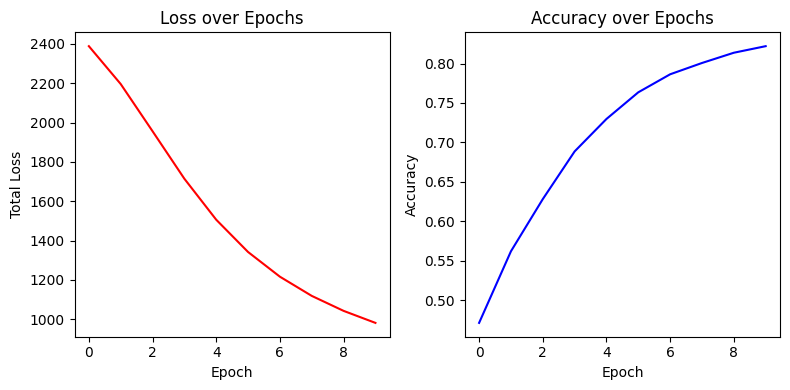

In [36]:
plot(cum_loss_list,acc_epoch)

In [37]:
evaluate(test_dataloader)

0.819078947368421

In [38]:
print(torch.cuda.is_available())  # Should print True if CUDA is available

False


In [39]:
import torch
from sklearn.manifold import TSNE
import plotly.graph_objs as go

# Assuming the model is already on the GPU (device) and the data is available in 'valid_dataloader'

# 1. Get the first batch from the validation data
batch = next(iter(valid_dataloader))

# 2. Extract the label, text, and offsets from the batch
label, text, offsets = batch

# 3. Move data to the device (GPU if available)
label = label.to(device)
text = text.to(device)
offsets = offsets.to(device)

# 4. Get the embeddings for the batch (from the model)
embedded = model.embedding(text, offsets)

# 5. Convert the embeddings to a numpy array for t-SNE processing
embeddings_numpy = embedded.detach().cpu().numpy()

# 6. Perform t-SNE dimensionality reduction (reducing to 3D)
X_embedded_3d = TSNE(n_components=3).fit_transform(embeddings_numpy)

# 7. Create a 3D scatter plot using Plotly
trace = go.Scatter3d(
    x=X_embedded_3d[:, 0],
    y=X_embedded_3d[:, 1],
    z=X_embedded_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=label.cpu(),  # Use label for coloring the points
        colorscale='Viridis',
        opacity=0.8
    )
)

# 8. Define layout and axis labels
layout = go.Layout(
    title="3D t-SNE Visualization of Embeddings",
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    )
)

# 9. Create the figure and display it
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [40]:
article="""Canada navigated a stiff test against the Republic of Ireland on a rain soaked evening in Perth, coming from behind to claim a vital 2-1 victory at the Women’s World Cup.
Katie McCabe opened the scoring with an incredible Olimpico goal – scoring straight from a corner kick – as her corner flew straight over the despairing Canada goalkeeper Kailen Sheridan at Perth Rectangular Stadium in Australia.
Just when Ireland thought it had safely navigated itself to half time with a lead, Megan Connolly failed to get a clean connection on a clearance with the resulting contact squirming into her own net to level the score.
Minutes into the second half, Adriana Leon completed the turnaround for the Olympic champion, slotting home from the edge of the area to seal the three points."""

In [41]:
result = predict(article, text_pipeline)

markdown_content = f'''
<div style="background-color: lightgray; padding: 10px;">
    <h3>{article}</h3>
    <h4>The category of the news article: {result}</h4>
</div>
'''

md(markdown_content)


<div style="background-color: lightgray; padding: 10px;">
    <h3>Canada navigated a stiff test against the Republic of Ireland on a rain soaked evening in Perth, coming from behind to claim a vital 2-1 victory at the Women’s World Cup.
Katie McCabe opened the scoring with an incredible Olimpico goal – scoring straight from a corner kick – as her corner flew straight over the despairing Canada goalkeeper Kailen Sheridan at Perth Rectangular Stadium in Australia.
Just when Ireland thought it had safely navigated itself to half time with a lead, Megan Connolly failed to get a clean connection on a clearance with the resulting contact squirming into her own net to level the score.
Minutes into the second half, Adriana Leon completed the turnaround for the Olympic champion, slotting home from the edge of the area to seal the three points.</h3>
    <h4>The category of the news article: Sports</h4>
</div>


# Exercises
#### Exercise 1 - Load the pre-trained model (path = 'my_model.pth').

In [42]:
model.load_state_dict(torch.load('my_model.pth'))
model.eval()


TextClassificationModel(
  (embedding): EmbeddingBag(95811, 64, mode='mean')
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

# Exercise 2 - Define the list of new articles for classification.

In [43]:
new_articles = [
    "International talks have made significant headway with the signing of a climate accord that commits countries to reduce emissions by 40% over the next two decades. World leaders expressed optimism at the conclusion of the summit.",
    "In a stunning upset, the underdog team won the national title, beating the favorites in a match that featured an incredible comeback and a last-minute goal that sealed their victory in front of a record crowd.",
    "Market analysts are optimistic as the tech startup's stock prices soared after the announcement of their latest product, which promises to revolutionize how we interact with smart devices.",
    "A recent study published in a leading scientific journal suggests that a new drug has shown promise in the treatment of Alzheimer's disease, outperforming current leading medications in early clinical trials.",
    "Diplomatic relations have taken a positive turn with the recent peace talks that aim to end decades of conflict. The ceasefire agreement has been welcomed by the international community.",
    "Economic indicators show a sharp rebound in manufacturing, with the automobile industry leading the charge. Analysts predict this surge will result in significant job creation over the next year.",
    "Researchers at the university's astrophysics department have discovered a potentially habitable exoplanet. The planet, which lies in a nearby star system, has conditions that could support liquid water and, possibly, life.",
    "The sports world is in shock as a legendary player announces their retirement. Over an illustrious 20-year career, the athlete has amassed numerous records and is regarded as one of the greatest to ever play the game.",
    "A multinational corporation has announced a major investment in renewable energy. The initiative includes the construction of new wind farms and solar panels that will power hundreds of thousands of homes.",
    "Climate scientists warn that the melting of the polar ice caps has been accelerating at an alarming rate, raising sea levels and threatening coastal cities worldwide with increased flooding risks."
]

# Exercise 3 - Classify each article and display the results.

In [44]:
for i, article in enumerate(new_articles, start=1):
    prediction = predict(article, text_pipeline)
    print(f"Article {i} is classified as: {prediction}\n")

Article 1 is classified as: World

Article 2 is classified as: Sports

Article 3 is classified as: Business

Article 4 is classified as: Sci/Tec

Article 5 is classified as: World

Article 6 is classified as: Business

Article 7 is classified as: Sci/Tec

Article 8 is classified as: Sports

Article 9 is classified as: Sci/Tec

Article 10 is classified as: Sci/Tec

